# Deep Learning A Z Convolucional - MNIST simples

In [1]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [2]:
tf.__version__, keras.__version__, matplotlib.__version__, np.__version__

('2.17.0', '3.6.0', '3.9.2', '1.26.4')

In [3]:
from tensorflow.keras.datasets import mnist # Banco de dados MNIST (dígitos escritos à mão)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [4]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() # Carrega o banco de dados MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_treinamento.shape, X_teste.shape
# Existem 60.000 imagens de treinamento e 10.000 imagens de teste
# Cada imagem tem 28x28 pixels, totalizando 784 pixels

((60000, 28, 28), (10000, 28, 28))

In [7]:
28 * 28

784

In [7]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
y_treinamento # Classes dos dígitos

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe 9')

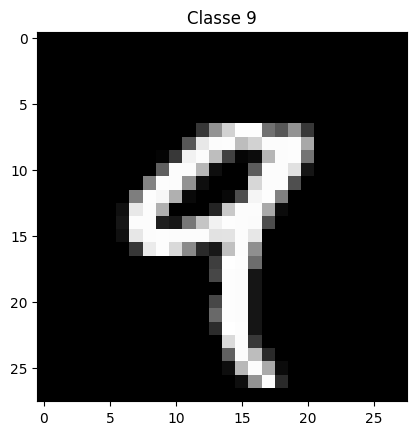

In [15]:
plt.imshow(X_treinamento[4], cmap='gray')
plt.title('Classe ' + str(y_treinamento[4]))

In [16]:
X_treinamento.shape

(60000, 28, 28)

In [17]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
# Utilizamos o reshape para que seja possível adicionar a escala de cinza (indicados pelo valor 1 no final)
# Caso fosse uma imagem colorida, o valor seria 3 (RGB)

In [19]:
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [23]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [21]:
X_treinamento = X_treinamento.astype('float32')

In [22]:
X_teste = X_teste.astype('float32')

In [24]:
# Normalização dos dados
X_treinamento /= 255
X_teste /= 255

In [25]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [26]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10) # Utilização do one hot encoding para transformar as classes em vetores
y_teste = np_utils.to_categorical(y_teste, 10)

In [28]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
y_treinamento[4] # Indica que o número é o 9

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [32]:
rede_neural = Sequential() # Criação da rede neural

rede_neural.add(InputLayer(shape =(28, 28, 1))) # Camada de entrada (28x28 pixels e 1 canal de cor)

# Camadas convolucionais
rede_neural.add(Conv2D(filters = 32, # Quantidade de kernels (detectores de características) 
                       kernel_size = (3, 3), # Tamanho do kernel (matriz 3x3)
                       activation = 'relu') # Função de ativação
                )
rede_neural.add(MaxPooling2D(pool_size = (2, 2))) # Camada de pooling (redução da dimensionalidade)

rede_neural.add(Flatten()) # Transforma a matriz em um vetor

# Criação da rede neural tradicional
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dense(units = 10, activation = 'softmax')) # Utilização de 10 neurônios na camada de saída (um para cada classe (numero 0 até 9))

In [33]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128,
                epochs = 5, validation_data = (X_teste, y_teste))
# Como a validação é feita utilizando o conjunto de teste, o accuracy da direita deve ser considerado.
# val_accuracy: 0.9844 - val_loss: 0.0423

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8861 - loss: 0.4402 - val_accuracy: 0.9737 - val_loss: 0.0809
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9804 - loss: 0.0693 - val_accuracy: 0.9827 - val_loss: 0.0530
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9792 - val_loss: 0.0604
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9824 - val_loss: 0.0558
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9932 - loss: 0.0238 - val_accuracy: 0.9844 - val_loss: 0.0423


In [36]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0506


In [37]:
resultado

[0.04227803647518158, 0.9843999743461609]

# Melhorando a rede neural

In [44]:
from keras.src.layers.normalization.batch_normalization import BatchNormalization

In [45]:
rede_neural = Sequential() # Criação da rede neural

rede_neural.add(InputLayer(shape =(28, 28, 1))) # Camada de entrada (28x28 pixels e 1 canal de cor)

# Camadas convolucionais
rede_neural.add(Conv2D(filters = 32, # Quantidade de kernels (detectores de características) 
                       kernel_size = (3, 3), # Tamanho do kernel (matriz 3x3)
                       activation = 'relu') # Função de ativação
                )
rede_neural.add(BatchNormalization()) # Camada de processamento que normaliza a saída da camada anterior
rede_neural.add(MaxPooling2D(pool_size = (2, 2))) # Camada de pooling (redução da dimensionalidade)

rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2, 2)))

rede_neural.add(Flatten()) # Transforma a matriz em um vetor

rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2)) # Adicionando camadas de dropout para evitar overfitting
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 10, activation = 'softmax')) # Utilização de 10 neurônios na camada de saída (um para cada classe (numero 0 até 9))

In [46]:
rede_neural.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [47]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128,
                epochs=5, validation_data = (X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8574 - loss: 0.4466 - val_accuracy: 0.9225 - val_loss: 0.2599
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9793 - loss: 0.0688 - val_accuracy: 0.9849 - val_loss: 0.0461
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9856 - loss: 0.0489 - val_accuracy: 0.9870 - val_loss: 0.0393
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.9883 - loss: 0.0398 - val_accuracy: 0.9878 - val_loss: 0.0397
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9911 - loss: 0.0304 - val_accuracy: 0.9907 - val_loss: 0.0324


In [49]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0445


In [50]:
resultado

[0.03235432505607605, 0.9907000064849854]

In [ ]:
resultado # Esse resultado é do modelo sem as melhorias

[0.04227803647518158, 0.9843999743461609]

* É possível verificar que mesmo com um modelo mais robusto, o resultado foi praticamente o mesmo. Isso permite visualizar que é necessário avaliar a complexidade do problema para assim decidir a organização da rede, visto que o tempo de processamento é um fator crucial